# 모의고사

In [1]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
사이킷런의 라이브러리들을 미리 불러두는 것도 좋지만,
세부적인 메쏘드가 너무 많아서 필요한것만 불러오도록 할 것이다.
'''


'\n사이킷런의 라이브러리들을 미리 불러두는 것도 좋지만,\n세부적인 메쏘드가 너무 많아서 필요한것만 불러오도록 할 것이다.\n'

# Data Loading : 인터넷이 되는 환경에서 실행하세요.

In [2]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

In [3]:
rides.drop(['casual', 'registered'], axis=1, inplace=True)

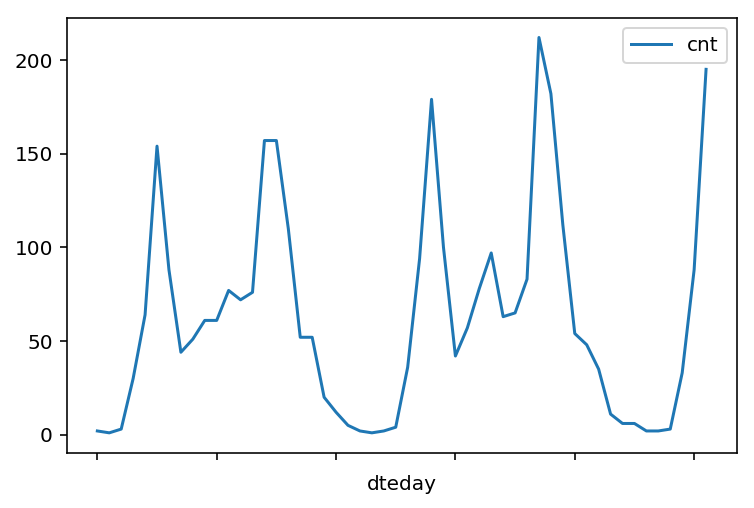

In [4]:
rides[48:100].plot(x='dteday',y='cnt')

In [5]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


# Q1 :  출, 퇴근시간 컬럼을 만들라.

**조건**

1. 데이터를 살펴서 어떤게 시간을 가르키는 컬럼인지 확인한다. (hr이다.)
1. 7,8,9 시를 출근시간이라고 한다.
1. 17,18,19 시를 퇴근시간이라고 한다.
2. ct라는 이름의 컬럼을 만들어 출퇴근 시간대를 표시한다.
    * 출근 시간은 1로 표시한다.
    * 퇴근 시간은 2로 표시한다.
    * 나머지 시간은 0으로 표시한다.

In [6]:
###################
#### your code ####
###################

rides['ct'] = 0

rides.loc[rides['hr'].isin([7,8,9]), 'ct'] = 1
rides.loc[rides['hr'].isin([17,18,19]), 'ct'] = 2

# Q2 : Dummy Variable

Season, weathersit, mnth, hr, weekday 등의 Categorical Variable들을 Dummy로 만들어서 원래 데이터 프레임(rides)에 붙여라(Column bind)

In [7]:
###################
#### your code ####
###################

dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)



In [8]:
#### drop 시킬 field 들
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,cnt,ct,season_1,season_2,season_3,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,32,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,13,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Scaling


In [9]:
quant_features = ['temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [10]:
'''
위에서 쓰인 Dictionary 잠깐 짚어보기.
Dictionary의 각각의 원소는 key : value 쌍으로 되어 있다.
'''

scaled_features

{'temp': [0.4969871684216586, 0.19255612124972407],
 'hum': [0.6272288394038822, 0.1929298340629125],
 'windspeed': [0.1900976063064631, 0.12234022857279413]}

### Splitting the data into training, testing, and validation sets!

In [11]:
test_data = data[-21*24:]
val_data = data[-81*24:-21*24]
train_data = data[:-81*24]

target_fields = ['cnt']
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
val_features, val_targets = val_data.drop(target_fields, axis=1), val_data[target_fields]
train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]

train_targets.head()

,cnt
0,16
1,40
2,32
3,13
4,1


# Modeling I : simple Linear Regression

## 조건

1. slr 에 linear regression을 선언하고 학습하라.
2. 예측값을 담는다.
    * train_pred : 트레이닝셋의 예측값
    * val_pred : 벨리데이션셋의 예측값
    * test_pred : 테스트셋의 예측값


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# 모델 준비
slr = LinearRegression()

# 모델 training
slr.fit(train_features, train_targets)

# Training & Validation set에서의 예측값 준비
train_pred, val_pred = slr.predict(train_features), slr.predict(val_features)
test_pred = slr.predict(test_features)

# Q3. val_targets 와 val_pred 사이의 rmse를 구하라

* 정수만 적을 것!

In [14]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_targets, val_pred))

123.34662439436514

# Q4. val_targets와 val_pred의 출근시간때의 rmse를 구하라.


In [15]:
c_real = val_targets[val_features['ct']==1]
c_pred = val_pred[val_features['ct']==1]

np.sqrt(mean_squared_error(c_real, c_pred ))

192.7511991651193

# Q5. val_targets와 val_pred의 퇴근시간때의 rmse를 구하라.


In [16]:
t_real = val_targets[val_features['ct']==2]
t_pred = val_pred[val_features['ct']==2]

np.sqrt(mean_squared_error(t_real, t_pred ))

174.91911054099805

# Q6. val_targets와 val_pred의 출퇴근시간이 아닐 때의 rmse를 구하라.

* 정수만 적을 것!

In [17]:
nct_real = val_targets[val_features['ct']==0]
nct_pred = val_pred[val_features['ct']==0]

np.sqrt(mean_squared_error(nct_real, nct_pred ))

94.65852394794457

# Modeling II : 출근 시간용 linear regression

1. clr 에 linear regression을 선언하고 학습하라.
2. 'ct'컬럼을 이용하여 트레이닝 셋에서 퇴근시간만 학습 데이터로 사용한다.
2. 예측값을 담는다.
    * train_pred_c : 트레이닝셋의 예측값
    * val_pred_c : 벨리데이션셋의 예측값

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# 모델 준비
clr = LinearRegression()

# 모델 training
clr.fit(train_features[train_features['ct']==1], train_targets[train_features['ct']==1])

# Training & Validation set에서의 예측값 준비
train_pred_c, val_pred_c = clr.predict(train_features[train_features['ct']==1]), clr.predict(val_features[val_features['ct']==1])

# Q7. 출근시간의 val_targets와 val_pred_c 사이의 rmse를 구하라.
* 정수만 작성한다!

In [20]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_targets[val_features['ct']==1], val_pred_c))

129.62454376532523

# Q8. 4번의 rmse와 7번의 rmse 에 대하여 다음 질문에 답하여라.

## Q8.1 : 개선되었는가?

## Q8.2 : 차이를 구하라. (계산후 정수만 적을 것)

In [21]:
# 개선됨

192.99370293905213-129.53048337863052


63.46321956042161

# Modeling III : 퇴근 시간용 linear regression

1. tlr 에 linear regression을 선언하고 학습하라.
2. 'ct'컬럼을 이용하여 트레이닝 셋에서 퇴근시간만 학습 데이터로 사용한다.
2. 예측값을 담는다.
    * train_pred_t : 트레이닝셋의 예측값
    * val_pred_t : 벨리데이션셋의 예측값

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
# 모델 준비
tlr = LinearRegression()

# 모델 training
tlr.fit(train_features[train_features['ct']==2], train_targets[train_features['ct']==2])

# Training & Validation set에서의 예측값 준비
train_pred_t, val_pred_t = tlr.predict(train_features[train_features['ct']==2]), tlr.predict(val_features[val_features['ct']==2])

# Q9. 퇴근시간의 val_targets와 val_pred_t 사이의 rmse를 구하라.
* 정수만 작성한다!

In [24]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_targets[val_features['ct']==2], val_pred_t))

124.2617368274531

# Q10. 6번의 rmse와 9번의 rmse 에 대하여 다음 질문에 답하여라.

## Q10.1 : 개선되었는가?

## Q10.2 : 차이를 구하라. (계산후 정수만 적을 것)

In [25]:
# 개선됨

175.1747482682369 - 124.9907951699642

50.183953098272696

# Modeling IV : Gradient boosting

## 조건

1. gbr 에 gradient boost regressor를 선언하고 학습하라.
2. 예측값을 담는다.
    * train_pred_g : 트레이닝셋의 예측값
    * val_pred_g : 벨리데이션셋의 예측값
    * test_pred_g : 테스트셋의 예측값


In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
# 모델 준비
gbr = GradientBoostingRegressor()

# 모델 training
gbr.fit(train_features, train_targets)

# Training & Validation set에서의 예측값 준비
train_pred_g, val_pred_g = gbr.predict(train_features), gbr.predict(val_features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Q11. val_targets 와 val_pred_g 사이의 rmse를 구하라

* 정수만 적을 것!

In [28]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(val_targets, val_pred_g))

117.66746718688364

# Q12 Model I의 regression에 비해 성능이 어떤가? rmse를 비교하여라.

In [29]:
123.43389613234172-117.66746718688364

5.766428945458074